0.7999999999999998
0.7999999999999998
0.7999999999999998
0.7999999999999998


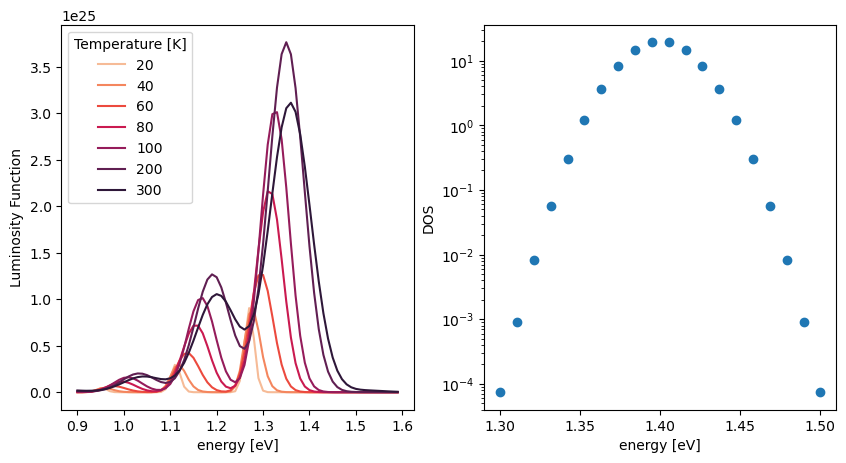

In [29]:
from pl_temp_fit import generate_data_utils, Exp_data_utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
E , sigma,Lo = 1.4, 0.02, 0.03
numbrstates = 20
fixed_parameters_dict = {
    "EX":{'numbrstates':numbrstates},
    "CT":{'off':1},  
    "D":{'hw':np.arange(0, 5, 0.01)},
}
true_parameters ={
    "EX":{"E":E,"sigma":sigma,"Li":7.8e-2,"Lo":Lo,"hO":0.159},
    "CT":{},
    "D":{},
}
temperature_list_PL = [20,40,60,80,100,200,300]
hws_PL = np.arange(0.9,1.6,0.01)
model_data_PL, EX_kr, Ex_knr = generate_data_utils.pl_trial(
    temperature_list_PL,
    hws_PL,
    fixed_parameters_dict,
    true_parameters,
)
color_list = sns.color_palette("rocket_r", len(temperature_list_PL))
fig, axes = plt.subplots(1,2,figsize=(10,5))
ax = axes[0]
for i in range(len(temperature_list_PL)):
    ax.plot(hws_PL,model_data_PL[:,i],color=color_list[i])
ax.set_xlabel('energy [eV]')
ax.set_ylabel('Luminosity Function')
ax.legend(temperature_list_PL,title='Temperature [K]')
ax = axes[1]
DG0 = np.linspace(
            E- disorder_extent * sigma, E+disorder_extent*sigma, numbrstates
        )
ax.scatter(DG0, np.exp(-((DG0-E)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2),label='Gaussian')
ax.set_xlabel('energy [eV]')
ax.set_ylabel('DOS')
ax.set_yscale('log')

In [17]:
model_data_PL.shape

(120, 7)